In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 150)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),10)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(10):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [30]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(10 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

2

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1135
number of class2:482

 ****** Running generation 0 ****** 

Population's average fitness: 0.46989 stdev: 0.15428
Best fitness: 0.76500 - size: (2, 13) - species 3 - id 34
Average adjusted fitness: 0.212
Mean genetic distance 2.906, standard deviation 0.496
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 5.371 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56964 stdev: 0.14408
Best fitness: 0.76500 - size: (2, 13) - species 5 - id 34
Average adjusted fitness: 0.290
Mean genetic distance 3.017, standard deviation 0.507
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 5.671 sec (5.521 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58448 stdev: 0.15300
Best fitness: 0.76500 - size: (2, 13) - species 3 - id 34
Average adjusted fitness: 0.336
Mean genetic distance 3.069, standard deviation 0.502
Population of 198 members in 34 species
Total extinctions

Mean genetic distance 3.197, standard deviation 0.528
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 7.758 sec (7.220 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.65995 stdev: 0.11571
Best fitness: 0.77551 - size: (6, 21) - species 32 - id 3325
Average adjusted fitness: 0.361
Mean genetic distance 3.175, standard deviation 0.524
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 7.603 sec (7.301 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64906 stdev: 0.13066
Best fitness: 0.77551 - size: (6, 21) - species 32 - id 3325
Average adjusted fitness: 0.353
Mean genetic distance 3.188, standard deviation 0.533
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 7.586 sec (7.364 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.66153 stdev: 0.12638
Best fitness: 0.78788 - size: (7, 23) - species 32 - id 3769


Mean genetic distance 3.375, standard deviation 0.552
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 8.611 sec (8.533 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.63677 stdev: 0.14699
Best fitness: 0.79344 - size: (8, 25) - species 32 - id 4520
Average adjusted fitness: 0.390
Mean genetic distance 3.388, standard deviation 0.572
Population of 206 members in 18 species
Total extinctions: 0
Generation time: 9.004 sec (8.598 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.63932 stdev: 0.14531
Best fitness: 0.79344 - size: (8, 25) - species 32 - id 4520
Average adjusted fitness: 0.343
Mean genetic distance 3.369, standard deviation 0.550
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 9.514 sec (8.702 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.64030 stdev: 0.14001
Best fitness: 0.79344 - size: (8, 25) - species 32 - id 4520


Mean genetic distance 3.277, standard deviation 0.596
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 10.063 sec (9.874 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.64596 stdev: 0.13943
Best fitness: 0.80025 - size: (10, 28) - species 53 - id 8130
Average adjusted fitness: 0.345
Mean genetic distance 3.228, standard deviation 0.600
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 10.426 sec (9.960 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.62211 stdev: 0.15693
Best fitness: 0.80025 - size: (10, 28) - species 53 - id 8130
Average adjusted fitness: 0.352
Mean genetic distance 3.210, standard deviation 0.579
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 10.795 sec (10.034 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.64501 stdev: 0.14736
Best fitness: 0.80025 - size: (10, 28) - species 53 - i

Population's average fitness: 0.65042 stdev: 0.14135
Best fitness: 0.82004 - size: (21, 53) - species 59 - id 14525
Average adjusted fitness: 0.352
Mean genetic distance 3.123, standard deviation 0.627
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 12.647 sec (12.306 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.65417 stdev: 0.13949
Best fitness: 0.82004 - size: (21, 53) - species 59 - id 14525
Average adjusted fitness: 0.364
Mean genetic distance 3.113, standard deviation 0.616
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 12.380 sec (12.367 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.63181 stdev: 0.15109
Best fitness: 0.82004 - size: (21, 53) - species 59 - id 14525
Average adjusted fitness: 0.355
Mean genetic distance 3.123, standard deviation 0.607
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 12.548 sec (12.435 avera

Population's average fitness: 0.63190 stdev: 0.16774
Best fitness: 0.82437 - size: (22, 60) - species 59 - id 16803
Average adjusted fitness: 0.291
Mean genetic distance 3.222, standard deviation 0.631
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 12.333 sec (12.928 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.63517 stdev: 0.16280
Best fitness: 0.82437 - size: (22, 60) - species 59 - id 16803
Average adjusted fitness: 0.308
Mean genetic distance 3.208, standard deviation 0.649
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 12.182 sec (12.898 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.63789 stdev: 0.16421
Best fitness: 0.82437 - size: (22, 60) - species 59 - id 16803
Average adjusted fitness: 0.326
Mean genetic distance 3.250, standard deviation 0.607
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 12.125 sec (12.846 ave

Population's average fitness: 0.62927 stdev: 0.17099
Best fitness: 0.83488 - size: (23, 62) - species 59 - id 22096
Average adjusted fitness: 0.335
Mean genetic distance 3.303, standard deviation 0.606
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 13.510 sec (13.658 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.65346 stdev: 0.16102
Best fitness: 0.83488 - size: (23, 62) - species 59 - id 22096
Average adjusted fitness: 0.379
Mean genetic distance 3.299, standard deviation 0.620
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 12.914 sec (13.657 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.63083 stdev: 0.18088
Best fitness: 0.83488 - size: (23, 62) - species 59 - id 22096
Average adjusted fitness: 0.333
Mean genetic distance 3.307, standard deviation 0.630
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 12.725 sec (13.640 ave

Generation time: 6.785 sec (6.795 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63558 stdev: 0.12308
Best fitness: 0.83735 - size: (6, 21) - species 34 - id 1221
Average adjusted fitness: 0.343
Mean genetic distance 3.233, standard deviation 0.543
Population of 190 members in 28 species
Total extinctions: 0
Generation time: 6.724 sec (6.784 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63335 stdev: 0.12172
Best fitness: 0.83735 - size: (6, 21) - species 34 - id 1221
Average adjusted fitness: 0.314
Mean genetic distance 3.234, standard deviation 0.541
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 6.941 sec (6.832 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62789 stdev: 0.12759
Best fitness: 0.83735 - size: (6, 21) - species 34 - id 1221
Average adjusted fitness: 0.245
Mean genetic distance 3.272, standard deviation 0.539
Population of 193 members in 

Population's average fitness: 0.63326 stdev: 0.12923
Best fitness: 0.84601 - size: (13, 36) - species 30 - id 5581
Average adjusted fitness: 0.252
Mean genetic distance 3.231, standard deviation 0.568
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 8.634 sec (8.429 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.64221 stdev: 0.12494
Best fitness: 0.84601 - size: (13, 36) - species 30 - id 5581
Average adjusted fitness: 0.233
Mean genetic distance 3.216, standard deviation 0.568
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 8.299 sec (8.424 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.66063 stdev: 0.11960
Best fitness: 0.84601 - size: (13, 36) - species 30 - id 5581
Average adjusted fitness: 0.369
Mean genetic distance 3.208, standard deviation 0.552
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 8.514 sec (8.409 average)

 ***

Population's average fitness: 0.66378 stdev: 0.12843
Best fitness: 0.85529 - size: (13, 34) - species 30 - id 9083
Average adjusted fitness: 0.278
Mean genetic distance 3.061, standard deviation 0.516
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 9.994 sec (10.326 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.65810 stdev: 0.12376
Best fitness: 0.85529 - size: (13, 34) - species 30 - id 9083
Average adjusted fitness: 0.255
Mean genetic distance 3.049, standard deviation 0.518
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 10.267 sec (10.381 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.65946 stdev: 0.12671
Best fitness: 0.85529 - size: (13, 34) - species 30 - id 9083
Average adjusted fitness: 0.366
Mean genetic distance 3.063, standard deviation 0.520
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 10.328 sec (10.323 average)


Population's average fitness: 0.65483 stdev: 0.11733
Best fitness: 0.85529 - size: (13, 34) - species 30 - id 9083
Average adjusted fitness: 0.242
Mean genetic distance 3.191, standard deviation 0.568
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 11.922 sec (11.543 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.64616 stdev: 0.12715
Best fitness: 0.85529 - size: (13, 34) - species 30 - id 9083
Average adjusted fitness: 0.266
Mean genetic distance 3.237, standard deviation 0.559
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 12.786 sec (11.697 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.66810 stdev: 0.11566
Best fitness: 0.85529 - size: (13, 34) - species 30 - id 9083
Average adjusted fitness: 0.255
Mean genetic distance 3.249, standard deviation 0.554
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 12.540 sec (11.829 average)

Population's average fitness: 0.65131 stdev: 0.13242
Best fitness: 0.85529 - size: (13, 34) - species 30 - id 9083
Average adjusted fitness: 0.341
Mean genetic distance 3.090, standard deviation 0.606
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 13.773 sec (14.155 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.65314 stdev: 0.13188
Best fitness: 0.85529 - size: (13, 34) - species 30 - id 9083
Average adjusted fitness: 0.253
Mean genetic distance 3.106, standard deviation 0.618
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 14.003 sec (14.175 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.66034 stdev: 0.13629
Best fitness: 0.85529 - size: (13, 34) - species 30 - id 9083
Average adjusted fitness: 0.267
Mean genetic distance 3.069, standard deviation 0.607
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 13.965 sec (14.147 averag

Population's average fitness: 0.66174 stdev: 0.11970
Best fitness: 0.85838 - size: (23, 57) - species 75 - id 20759
Average adjusted fitness: 0.257
Mean genetic distance 3.179, standard deviation 0.616
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 13.842 sec (14.211 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.66208 stdev: 0.12314
Best fitness: 0.85838 - size: (23, 57) - species 75 - id 20759
Average adjusted fitness: 0.263
Mean genetic distance 3.181, standard deviation 0.608
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 13.466 sec (14.186 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.67354 stdev: 0.12140
Best fitness: 0.85838 - size: (23, 57) - species 75 - id 20759
Average adjusted fitness: 0.432
Mean genetic distance 3.185, standard deviation 0.613
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 13.457 sec (14.107 ave

Population's average fitness: 0.66802 stdev: 0.15184
Best fitness: 0.85591 - size: (6, 20) - species 18 - id 1230
Average adjusted fitness: 0.409
Mean genetic distance 3.201, standard deviation 0.506
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 6.844 sec (6.622 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66709 stdev: 0.14446
Best fitness: 0.85591 - size: (6, 20) - species 18 - id 1230
Average adjusted fitness: 0.390
Mean genetic distance 3.200, standard deviation 0.506
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 7.138 sec (6.738 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.67640 stdev: 0.13760
Best fitness: 0.85714 - size: (7, 22) - species 18 - id 2113
Average adjusted fitness: 0.370
Mean genetic distance 3.216, standard deviation 0.506
Population of 207 members in 43 species
Total extinctions: 0
Generation time: 6.960 sec (6.813 average)

 ******

Mean genetic distance 3.310, standard deviation 0.550
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 8.279 sec (7.898 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.70019 stdev: 0.14470
Best fitness: 0.87631 - size: (4, 17) - species 27 - id 3717
Average adjusted fitness: 0.400
Mean genetic distance 3.312, standard deviation 0.552
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 8.342 sec (7.962 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.67278 stdev: 0.17341
Best fitness: 0.87631 - size: (4, 17) - species 27 - id 3717
Average adjusted fitness: 0.399
Mean genetic distance 3.317, standard deviation 0.548
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 8.410 sec (8.030 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.66851 stdev: 0.17083
Best fitness: 0.87631 - size: (4, 17) - species 27 - id 3717


Mean genetic distance 3.269, standard deviation 0.591
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 9.022 sec (9.051 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.68690 stdev: 0.16007
Best fitness: 0.90600 - size: (8, 27) - species 50 - id 7618
Average adjusted fitness: 0.392
Mean genetic distance 3.267, standard deviation 0.582
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 9.151 sec (9.085 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.66399 stdev: 0.18240
Best fitness: 0.90600 - size: (8, 27) - species 50 - id 7618
Average adjusted fitness: 0.380
Mean genetic distance 3.258, standard deviation 0.573
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 9.232 sec (9.106 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.70277 stdev: 0.14686
Best fitness: 0.90600 - size: (8, 27) - species 50 - id 7618


Mean genetic distance 3.096, standard deviation 0.609
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 10.631 sec (10.505 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.66970 stdev: 0.18345
Best fitness: 0.90724 - size: (8, 27) - species 50 - id 10931
Average adjusted fitness: 0.361
Mean genetic distance 3.070, standard deviation 0.621
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 10.447 sec (10.532 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.65856 stdev: 0.18935
Best fitness: 0.90724 - size: (8, 27) - species 50 - id 10931
Average adjusted fitness: 0.376
Mean genetic distance 3.097, standard deviation 0.647
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 10.322 sec (10.534 average)

 ****** Running generation 87 ****** 

Population's average fitness: 0.63743 stdev: 0.19538
Best fitness: 0.90724 - size: (8, 27) - species 50 - 

Population's average fitness: 0.70988 stdev: 0.15825
Best fitness: 0.91218 - size: (14, 42) - species 27 - id 15742
Average adjusted fitness: 0.482
Mean genetic distance 3.114, standard deviation 0.553
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 11.064 sec (11.119 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.70495 stdev: 0.16681
Best fitness: 0.91218 - size: (14, 42) - species 27 - id 15742
Average adjusted fitness: 0.397
Mean genetic distance 3.107, standard deviation 0.574
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 11.259 sec (11.160 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.69257 stdev: 0.17697
Best fitness: 0.91218 - size: (14, 42) - species 27 - id 15742
Average adjusted fitness: 0.505
Mean genetic distance 3.106, standard deviation 0.556
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 11.252 sec (11.179 ave

Population's average fitness: 0.71959 stdev: 0.16669
Best fitness: 0.91218 - size: (14, 42) - species 27 - id 15742
Average adjusted fitness: 0.448
Mean genetic distance 3.032, standard deviation 0.615
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 12.632 sec (11.105 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.73099 stdev: 0.15664
Best fitness: 0.91218 - size: (14, 42) - species 27 - id 15742
Average adjusted fitness: 0.430
Mean genetic distance 3.045, standard deviation 0.605
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 11.262 sec (11.140 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.71045 stdev: 0.17849
Best fitness: 0.91218 - size: (14, 42) - species 27 - id 15742
Average adjusted fitness: 0.402
Mean genetic distance 3.035, standard deviation 0.608
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 10.847 sec (11.133 ave

Generation time: 6.354 sec (5.840 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63584 stdev: 0.13676
Best fitness: 0.82375 - size: (2, 14) - species 2 - id 225
Average adjusted fitness: 0.345
Mean genetic distance 3.028, standard deviation 0.498
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 6.372 sec (5.916 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61938 stdev: 0.15540
Best fitness: 0.82375 - size: (2, 14) - species 2 - id 225
Average adjusted fitness: 0.330
Mean genetic distance 3.064, standard deviation 0.503
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 6.370 sec (5.972 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63475 stdev: 0.14770
Best fitness: 0.82375 - size: (2, 14) - species 2 - id 225
Average adjusted fitness: 0.341
Mean genetic distance 3.035, standard deviation 0.501
Population of 201 members in 30 specie

Population's average fitness: 0.67891 stdev: 0.13237
Best fitness: 0.85034 - size: (3, 15) - species 2 - id 3455
Average adjusted fitness: 0.377
Mean genetic distance 3.059, standard deviation 0.560
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 7.443 sec (7.297 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.67591 stdev: 0.13134
Best fitness: 0.85343 - size: (4, 17) - species 6 - id 4808
Average adjusted fitness: 0.373
Mean genetic distance 3.087, standard deviation 0.552
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 7.569 sec (7.360 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.66885 stdev: 0.14009
Best fitness: 0.86147 - size: (3, 16) - species 2 - id 4968
Average adjusted fitness: 0.367
Mean genetic distance 3.095, standard deviation 0.571
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 7.807 sec (7.438 average)

 ****** Ru

Population of 203 members in 19 species
Total extinctions: 0
Generation time: 8.232 sec (8.247 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.68587 stdev: 0.13463
Best fitness: 0.86147 - size: (3, 16) - species 2 - id 4968
Average adjusted fitness: 0.363
Mean genetic distance 3.089, standard deviation 0.554
Population of 205 members in 20 species
Total extinctions: 0
Generation time: 9.359 sec (8.355 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.69115 stdev: 0.12841
Best fitness: 0.86147 - size: (3, 16) - species 2 - id 4968
Average adjusted fitness: 0.406
Mean genetic distance 3.094, standard deviation 0.553
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 8.843 sec (8.439 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.67121 stdev: 0.14623
Best fitness: 0.86147 - size: (3, 16) - species 2 - id 4968
Average adjusted fitness: 0.356
Mean genetic distance 3.1

Mean genetic distance 3.127, standard deviation 0.534
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 8.518 sec (8.499 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.72700 stdev: 0.12547
Best fitness: 0.87446 - size: (9, 27) - species 35 - id 11545
Average adjusted fitness: 0.421
Mean genetic distance 3.119, standard deviation 0.516
Population of 205 members in 18 species
Total extinctions: 0
Generation time: 8.575 sec (8.509 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.71042 stdev: 0.13957
Best fitness: 0.87446 - size: (9, 27) - species 35 - id 11545
Average adjusted fitness: 0.422
Mean genetic distance 3.126, standard deviation 0.531
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 8.982 sec (8.561 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.70096 stdev: 0.15062
Best fitness: 0.87446 - size: (9, 27) - species 35 - id 115

Mean genetic distance 3.034, standard deviation 0.539
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 8.701 sec (8.412 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.69843 stdev: 0.16117
Best fitness: 0.87446 - size: (9, 27) - species 35 - id 11545
Average adjusted fitness: 0.422
Mean genetic distance 3.096, standard deviation 0.539
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 8.446 sec (8.422 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.70051 stdev: 0.14953
Best fitness: 0.87446 - size: (9, 27) - species 35 - id 11545
Average adjusted fitness: 0.419
Mean genetic distance 3.082, standard deviation 0.534
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 9.056 sec (8.515 average)

 ****** Running generation 105 ****** 

Population's average fitness: 0.70134 stdev: 0.15453
Best fitness: 0.87446 - size: (9, 27) - species 35 - id 

Mean genetic distance 3.051, standard deviation 0.611
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 11.029 sec (10.953 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.71985 stdev: 0.14938
Best fitness: 0.87446 - size: (9, 27) - species 35 - id 11545
Average adjusted fitness: 0.430
Mean genetic distance 3.012, standard deviation 0.618
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 11.063 sec (11.018 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.69463 stdev: 0.16593
Best fitness: 0.87446 - size: (9, 27) - species 35 - id 11545
Average adjusted fitness: 0.418
Mean genetic distance 3.006, standard deviation 0.610
Population of 205 members in 13 species
Total extinctions: 0
Generation time: 11.604 sec (11.111 average)

 ****** Running generation 129 ****** 

Population's average fitness: 0.67135 stdev: 0.18113
Best fitness: 0.87446 - size: (9, 27) - species 35

Population's average fitness: 0.45276 stdev: 0.20306
Best fitness: 0.81262 - size: (2, 13) - species 6 - id 158
Average adjusted fitness: 0.270
Mean genetic distance 2.986, standard deviation 0.473
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 5.199 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59240 stdev: 0.20306
Best fitness: 0.83488 - size: (3, 15) - species 12 - id 244
Average adjusted fitness: 0.409
Mean genetic distance 3.085, standard deviation 0.478
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 5.544 sec (5.371 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62572 stdev: 0.21373
Best fitness: 0.83488 - size: (3, 15) - species 12 - id 244
Average adjusted fitness: 0.471
Mean genetic distance 3.086, standard deviation 0.469
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 5.920 sec (5.554 average)

 ****** Running generation 3 

Generation time: 7.319 sec (7.077 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.71829 stdev: 0.18019
Best fitness: 0.86085 - size: (5, 20) - species 1 - id 2244
Average adjusted fitness: 0.513
Mean genetic distance 3.121, standard deviation 0.486
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 7.275 sec (7.079 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.71863 stdev: 0.17729
Best fitness: 0.86147 - size: (6, 24) - species 28 - id 3557
Average adjusted fitness: 0.527
Mean genetic distance 3.132, standard deviation 0.483
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 7.404 sec (7.121 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.73387 stdev: 0.15779
Best fitness: 0.86209 - size: (7, 26) - species 28 - id 3723
Average adjusted fitness: 0.552
Mean genetic distance 3.156, standard deviation 0.494
Population of 198 members in 2

Total extinctions: 0
Generation time: 7.933 sec (7.957 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.72097 stdev: 0.17935
Best fitness: 0.87384 - size: (8, 26) - species 32 - id 5655
Average adjusted fitness: 0.523
Mean genetic distance 3.341, standard deviation 0.542
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 8.050 sec (7.955 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.73636 stdev: 0.15770
Best fitness: 0.87384 - size: (8, 26) - species 32 - id 5655
Average adjusted fitness: 0.539
Mean genetic distance 3.332, standard deviation 0.517
Population of 204 members in 20 species
Total extinctions: 0
Generation time: 8.260 sec (8.004 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.72185 stdev: 0.17697
Best fitness: 0.87384 - size: (8, 26) - species 32 - id 5655
Average adjusted fitness: 0.528
Mean genetic distance 3.347, standard deviation 0.504
Populati

Population's average fitness: 0.69051 stdev: 0.20642
Best fitness: 0.90724 - size: (10, 26) - species 15 - id 10151
Average adjusted fitness: 0.486
Mean genetic distance 3.239, standard deviation 0.590
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 9.926 sec (9.260 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.72161 stdev: 0.17388
Best fitness: 0.90724 - size: (10, 26) - species 15 - id 10151
Average adjusted fitness: 0.535
Mean genetic distance 3.216, standard deviation 0.609
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 9.678 sec (9.307 average)

 ****** Running generation 76 ****** 

Population's average fitness: 0.71248 stdev: 0.18842
Best fitness: 0.90724 - size: (10, 26) - species 15 - id 10151
Average adjusted fitness: 0.516
Mean genetic distance 3.229, standard deviation 0.578
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 9.616 sec (9.364 average)

 

Population's average fitness: 0.68291 stdev: 0.21251
Best fitness: 0.90724 - size: (10, 26) - species 15 - id 10151
Average adjusted fitness: 0.479
Mean genetic distance 3.173, standard deviation 0.609
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 11.012 sec (10.182 average)

 ****** Running generation 99 ****** 

Population's average fitness: 0.65987 stdev: 0.22950
Best fitness: 0.90724 - size: (10, 26) - species 15 - id 10151
Average adjusted fitness: 0.472
Mean genetic distance 3.163, standard deviation 0.598
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 10.859 sec (10.291 average)

 ****** Running generation 100 ****** 

Population's average fitness: 0.68222 stdev: 0.21720
Best fitness: 0.90724 - size: (10, 26) - species 15 - id 10151
Average adjusted fitness: 0.475
Mean genetic distance 3.065, standard deviation 0.588
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 10.604 sec (10.406 aver

Population's average fitness: 0.70187 stdev: 0.20363
Best fitness: 0.90724 - size: (10, 26) - species 15 - id 10151
Average adjusted fitness: 0.486
Mean genetic distance 3.142, standard deviation 0.559
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 11.256 sec (11.151 average)

 ****** Running generation 123 ****** 

Population's average fitness: 0.68733 stdev: 0.20865
Best fitness: 0.90724 - size: (10, 26) - species 15 - id 10151
Average adjusted fitness: 0.486
Mean genetic distance 3.133, standard deviation 0.537
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 11.039 sec (11.123 average)

 ****** Running generation 124 ****** 

Population's average fitness: 0.71757 stdev: 0.19493
Best fitness: 0.90724 - size: (10, 26) - species 15 - id 10151
Average adjusted fitness: 0.529
Mean genetic distance 3.139, standard deviation 0.570
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 11.334 sec (11.094 ave

Population's average fitness: 0.70292 stdev: 0.21234
Best fitness: 0.90724 - size: (10, 26) - species 15 - id 10151
Average adjusted fitness: 0.493
Mean genetic distance 3.094, standard deviation 0.597
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 10.166 sec (10.719 average)

 ****** Running generation 147 ****** 

Population's average fitness: 0.70659 stdev: 0.20755
Best fitness: 0.90724 - size: (10, 26) - species 15 - id 10151
Average adjusted fitness: 0.511
Mean genetic distance 3.118, standard deviation 0.584
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 10.185 sec (10.690 average)

 ****** Running generation 148 ****** 

Population's average fitness: 0.70870 stdev: 0.20205
Best fitness: 0.90724 - size: (10, 26) - species 15 - id 10151
Average adjusted fitness: 0.505
Mean genetic distance 3.109, standard deviation 0.603
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 10.346 sec (10.669 ave

Population's average fitness: 0.64096 stdev: 0.08889
Best fitness: 0.79159 - size: (5, 18) - species 27 - id 683
Average adjusted fitness: 0.284
Mean genetic distance 3.133, standard deviation 0.530
Population of 192 members in 26 species
Total extinctions: 0
Generation time: 7.190 sec (7.139 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.63831 stdev: 0.09581
Best fitness: 0.79159 - size: (5, 18) - species 27 - id 683
Average adjusted fitness: 0.283
Mean genetic distance 3.117, standard deviation 0.526
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 6.992 sec (7.157 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.63795 stdev: 0.09358
Best fitness: 0.79159 - size: (5, 18) - species 27 - id 683
Average adjusted fitness: 0.306
Mean genetic distance 3.143, standard deviation 0.526
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 7.150 sec (7.163 average)

 ****** Ru

Population's average fitness: 0.65015 stdev: 0.09699
Best fitness: 0.84601 - size: (8, 25) - species 31 - id 5915
Average adjusted fitness: 0.305
Mean genetic distance 3.181, standard deviation 0.541
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 8.410 sec (8.222 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.65290 stdev: 0.09970
Best fitness: 0.84601 - size: (8, 25) - species 31 - id 5915
Average adjusted fitness: 0.302
Mean genetic distance 3.168, standard deviation 0.542
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 8.081 sec (8.231 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.65505 stdev: 0.09701
Best fitness: 0.84601 - size: (8, 25) - species 31 - id 5915
Average adjusted fitness: 0.250
Mean genetic distance 3.141, standard deviation 0.536
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 7.926 sec (8.220 average)

 ******

Population's average fitness: 0.66262 stdev: 0.11066
Best fitness: 0.84601 - size: (7, 22) - species 42 - id 9224
Average adjusted fitness: 0.332
Mean genetic distance 3.198, standard deviation 0.565
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 8.847 sec (9.000 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.66635 stdev: 0.10198
Best fitness: 0.84601 - size: (7, 22) - species 42 - id 9224
Average adjusted fitness: 0.313
Mean genetic distance 3.206, standard deviation 0.571
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 8.896 sec (8.981 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.67122 stdev: 0.10049
Best fitness: 0.84601 - size: (7, 22) - species 42 - id 9224
Average adjusted fitness: 0.267
Mean genetic distance 3.214, standard deviation 0.577
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 8.694 sec (8.936 average)

 ******

Population of 199 members in 14 species
Total extinctions: 0
Generation time: 8.635 sec (8.360 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.68543 stdev: 0.10605
Best fitness: 0.85158 - size: (11, 30) - species 42 - id 13368
Average adjusted fitness: 0.295
Mean genetic distance 3.191, standard deviation 0.611
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 8.480 sec (8.424 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.67242 stdev: 0.10956
Best fitness: 0.85158 - size: (11, 30) - species 42 - id 13368
Average adjusted fitness: 0.270
Mean genetic distance 3.255, standard deviation 0.615
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 8.737 sec (8.531 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.66460 stdev: 0.12043
Best fitness: 0.85158 - size: (11, 30) - species 42 - id 13368
Average adjusted fitness: 0.365
Mean genetic dis

Mean genetic distance 3.219, standard deviation 0.576
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 10.025 sec (9.703 average)

 ****** Running generation 117 ****** 

Population's average fitness: 0.66658 stdev: 0.11491
Best fitness: 0.85158 - size: (11, 30) - species 42 - id 13368
Average adjusted fitness: 0.389
Mean genetic distance 3.212, standard deviation 0.581
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 9.718 sec (9.806 average)

 ****** Running generation 118 ****** 

Population's average fitness: 0.66548 stdev: 0.11384
Best fitness: 0.85158 - size: (11, 30) - species 42 - id 13368
Average adjusted fitness: 0.293
Mean genetic distance 3.229, standard deviation 0.582
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 9.956 sec (9.888 average)

 ****** Running generation 119 ****** 

Population's average fitness: 0.67605 stdev: 0.10771
Best fitness: 0.85158 - size: (11, 30) - species 42 -

Population's average fitness: 0.66673 stdev: 0.10880
Best fitness: 0.86209 - size: (13, 34) - species 42 - id 21621
Average adjusted fitness: 0.273
Mean genetic distance 3.252, standard deviation 0.578
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 10.856 sec (10.505 average)

 ****** Running generation 141 ****** 

Population's average fitness: 0.66254 stdev: 0.11140
Best fitness: 0.86209 - size: (13, 34) - species 42 - id 21621
Average adjusted fitness: 0.320
Mean genetic distance 3.243, standard deviation 0.555
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 10.766 sec (10.548 average)

 ****** Running generation 142 ****** 

Population's average fitness: 0.66387 stdev: 0.12679
Best fitness: 0.86209 - size: (13, 34) - species 42 - id 21621
Average adjusted fitness: 0.357
Mean genetic distance 3.263, standard deviation 0.539
Population of 205 members in 15 species
Total extinctions: 0
Generation time: 10.796 sec (10.554 ave

Population's average fitness: 0.65367 stdev: 0.12222
Best fitness: 0.80458 - size: (6, 22) - species 2 - id 1728
Average adjusted fitness: 0.345
Mean genetic distance 3.193, standard deviation 0.511
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 6.750 sec (6.620 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.65531 stdev: 0.12444
Best fitness: 0.80458 - size: (6, 22) - species 2 - id 1728
Average adjusted fitness: 0.346
Mean genetic distance 3.211, standard deviation 0.512
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 6.844 sec (6.697 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.66003 stdev: 0.12343
Best fitness: 0.80458 - size: (6, 22) - species 2 - id 1728
Average adjusted fitness: 0.365
Mean genetic distance 3.183, standard deviation 0.507
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 6.752 sec (6.743 average)

 ****** Ru

Population's average fitness: 0.66498 stdev: 0.13449
Best fitness: 0.80952 - size: (5, 23) - species 44 - id 5149
Average adjusted fitness: 0.382
Mean genetic distance 3.320, standard deviation 0.523
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 7.692 sec (7.596 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.67108 stdev: 0.12414
Best fitness: 0.80952 - size: (5, 23) - species 44 - id 5149
Average adjusted fitness: 0.383
Mean genetic distance 3.319, standard deviation 0.516
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 7.806 sec (7.625 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.68024 stdev: 0.12325
Best fitness: 0.80952 - size: (5, 23) - species 44 - id 5149
Average adjusted fitness: 0.381
Mean genetic distance 3.303, standard deviation 0.523
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 7.826 sec (7.651 average)

 ******

Population of 195 members in 18 species
Total extinctions: 0
Generation time: 9.071 sec (8.823 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.64862 stdev: 0.13979
Best fitness: 0.81200 - size: (7, 25) - species 57 - id 7914
Average adjusted fitness: 0.352
Mean genetic distance 3.210, standard deviation 0.576
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 9.025 sec (8.838 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.64872 stdev: 0.13522
Best fitness: 0.81200 - size: (7, 25) - species 57 - id 7914
Average adjusted fitness: 0.339
Mean genetic distance 3.143, standard deviation 0.585
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 9.073 sec (8.871 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.62476 stdev: 0.15278
Best fitness: 0.81385 - size: (11, 29) - species 27 - id 9540
Average adjusted fitness: 0.350
Mean genetic distance

Mean genetic distance 3.163, standard deviation 0.536
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 9.024 sec (9.400 average)

 ****** Running generation 87 ****** 

Population's average fitness: 0.65323 stdev: 0.13071
Best fitness: 0.81571 - size: (7, 28) - species 52 - id 11604
Average adjusted fitness: 0.347
Mean genetic distance 3.159, standard deviation 0.542
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 9.475 sec (9.376 average)

 ****** Running generation 88 ****** 

Population's average fitness: 0.64937 stdev: 0.14519
Best fitness: 0.81571 - size: (7, 28) - species 52 - id 11604
Average adjusted fitness: 0.430
Mean genetic distance 3.151, standard deviation 0.557
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 9.372 sec (9.367 average)

 ****** Running generation 89 ****** 

Population's average fitness: 0.64768 stdev: 0.14089
Best fitness: 0.81571 - size: (7, 28) - species 52 - id 116

Mean genetic distance 3.136, standard deviation 0.546
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 10.039 sec (10.234 average)

 ****** Running generation 111 ****** 

Population's average fitness: 0.64465 stdev: 0.13932
Best fitness: 0.83797 - size: (8, 32) - species 52 - id 15264
Average adjusted fitness: 0.375
Mean genetic distance 3.151, standard deviation 0.564
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 10.050 sec (10.203 average)

 ****** Running generation 112 ****** 

Population's average fitness: 0.64821 stdev: 0.13685
Best fitness: 0.83797 - size: (8, 32) - species 52 - id 15264
Average adjusted fitness: 0.335
Mean genetic distance 3.157, standard deviation 0.560
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 10.123 sec (10.198 average)

 ****** Running generation 113 ****** 

Population's average fitness: 0.64045 stdev: 0.14474
Best fitness: 0.83797 - size: (8, 32) - species 52

Population's average fitness: 0.64760 stdev: 0.14655
Best fitness: 0.84292 - size: (8, 32) - species 52 - id 18193
Average adjusted fitness: 0.355
Mean genetic distance 3.130, standard deviation 0.486
Population of 203 members in 20 species
Total extinctions: 0
Generation time: 11.031 sec (10.672 average)

 ****** Running generation 135 ****** 

Population's average fitness: 0.65958 stdev: 0.13874
Best fitness: 0.84292 - size: (8, 32) - species 52 - id 18193
Average adjusted fitness: 0.359
Mean genetic distance 3.130, standard deviation 0.486
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 11.633 sec (10.750 average)

 ****** Running generation 136 ****** 

Population's average fitness: 0.64443 stdev: 0.15403
Best fitness: 0.84292 - size: (8, 32) - species 52 - id 18193
Average adjusted fitness: 0.382
Mean genetic distance 3.140, standard deviation 0.501
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 11.471 sec (10.800 averag

Population's average fitness: 0.59518 stdev: 0.12230
Best fitness: 0.82127 - size: (4, 18) - species 41 - id 662
Average adjusted fitness: 0.279
Mean genetic distance 3.145, standard deviation 0.471
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 6.624 sec (6.080 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61569 stdev: 0.11669
Best fitness: 0.82808 - size: (5, 19) - species 36 - id 1400
Average adjusted fitness: 0.297
Mean genetic distance 3.141, standard deviation 0.462
Population of 201 members in 46 species
Total extinctions: 0
Generation time: 6.368 sec (6.109 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62503 stdev: 0.11398
Best fitness: 0.82808 - size: (5, 19) - species 36 - id 1400
Average adjusted fitness: 0.344
Mean genetic distance 3.155, standard deviation 0.454
Population of 195 members in 48 species
Total extinctions: 0
Generation time: 6.655 sec (6.262 average)

 ****** R

Population's average fitness: 0.64395 stdev: 0.13261
Best fitness: 0.83797 - size: (6, 22) - species 46 - id 3283
Average adjusted fitness: 0.302
Mean genetic distance 3.328, standard deviation 0.512
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 7.542 sec (7.307 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.64977 stdev: 0.13273
Best fitness: 0.84601 - size: (5, 20) - species 47 - id 4184
Average adjusted fitness: 0.303
Mean genetic distance 3.335, standard deviation 0.521
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 7.494 sec (7.382 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.66417 stdev: 0.11721
Best fitness: 0.84601 - size: (5, 20) - species 47 - id 4184
Average adjusted fitness: 0.280
Mean genetic distance 3.281, standard deviation 0.522
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 7.441 sec (7.409 average)

 ******

Population's average fitness: 0.65089 stdev: 0.14108
Best fitness: 0.86024 - size: (7, 25) - species 61 - id 6313
Average adjusted fitness: 0.341
Mean genetic distance 3.259, standard deviation 0.595
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 8.833 sec (8.697 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.66796 stdev: 0.13166
Best fitness: 0.86024 - size: (7, 25) - species 61 - id 6313
Average adjusted fitness: 0.289
Mean genetic distance 3.256, standard deviation 0.593
Population of 203 members in 21 species
Total extinctions: 0
Generation time: 8.904 sec (8.708 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.65872 stdev: 0.14505
Best fitness: 0.86024 - size: (7, 25) - species 61 - id 6313
Average adjusted fitness: 0.301
Mean genetic distance 3.220, standard deviation 0.574
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 9.508 sec (8.803 average)

 ******

Mean genetic distance 3.194, standard deviation 0.608
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 9.028 sec (8.977 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.65069 stdev: 0.13868
Best fitness: 0.86024 - size: (7, 25) - species 61 - id 6313
Average adjusted fitness: 0.315
Mean genetic distance 3.197, standard deviation 0.632
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 9.332 sec (9.026 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.65005 stdev: 0.15255
Best fitness: 0.86024 - size: (7, 25) - species 61 - id 6313
Average adjusted fitness: 0.354
Mean genetic distance 3.210, standard deviation 0.626
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 9.044 sec (9.037 average)

 ****** Running generation 83 ****** 

Population's average fitness: 0.64023 stdev: 0.15043
Best fitness: 0.86024 - size: (7, 25) - species 61 - id 6313


Mean genetic distance 3.091, standard deviation 0.609
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 9.790 sec (9.914 average)

 ****** Running generation 105 ****** 

Population's average fitness: 0.65330 stdev: 0.15789
Best fitness: 0.86085 - size: (8, 25) - species 62 - id 14983
Average adjusted fitness: 0.311
Mean genetic distance 3.108, standard deviation 0.615
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 10.019 sec (9.950 average)

 ****** Running generation 106 ****** 

Population's average fitness: 0.65411 stdev: 0.16040
Best fitness: 0.86085 - size: (8, 25) - species 62 - id 14983
Average adjusted fitness: 0.327
Mean genetic distance 3.117, standard deviation 0.595
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 10.001 sec (9.986 average)

 ****** Running generation 107 ****** 

Population's average fitness: 0.67172 stdev: 0.15343
Best fitness: 0.86085 - size: (8, 25) - species 62 - i

Population's average fitness: 0.64848 stdev: 0.15659
Best fitness: 0.86518 - size: (9, 26) - species 62 - id 19216
Average adjusted fitness: 0.268
Mean genetic distance 3.100, standard deviation 0.527
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 11.448 sec (11.176 average)

 ****** Running generation 129 ****** 

Population's average fitness: 0.65934 stdev: 0.15817
Best fitness: 0.86518 - size: (9, 26) - species 62 - id 19216
Average adjusted fitness: 0.345
Mean genetic distance 3.094, standard deviation 0.550
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 11.301 sec (11.250 average)

 ****** Running generation 130 ****** 

Population's average fitness: 0.68001 stdev: 0.14586
Best fitness: 0.86518 - size: (9, 26) - species 62 - id 19216
Average adjusted fitness: 0.326
Mean genetic distance 3.115, standard deviation 0.543
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 11.507 sec (11.251 averag

Population's average fitness: 0.56502 stdev: 0.09017
Best fitness: 0.76562 - size: (4, 17) - species 2 - id 435
Average adjusted fitness: 0.230
Mean genetic distance 3.039, standard deviation 0.502
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 5.787 sec (5.507 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57750 stdev: 0.08762
Best fitness: 0.77180 - size: (3, 14) - species 2 - id 688
Average adjusted fitness: 0.266
Mean genetic distance 3.070, standard deviation 0.496
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 6.082 sec (5.651 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59161 stdev: 0.09636
Best fitness: 0.77180 - size: (3, 14) - species 7 - id 688
Average adjusted fitness: 0.234
Mean genetic distance 3.073, standard deviation 0.494
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 6.375 sec (5.796 average)

 ****** Running

Total extinctions: 0
Generation time: 7.699 sec (7.016 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.64533 stdev: 0.09605
Best fitness: 0.80210 - size: (4, 19) - species 28 - id 3623
Average adjusted fitness: 0.303
Mean genetic distance 3.067, standard deviation 0.522
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 7.538 sec (7.082 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.64763 stdev: 0.09807
Best fitness: 0.80210 - size: (4, 19) - species 28 - id 3623
Average adjusted fitness: 0.269
Mean genetic distance 3.086, standard deviation 0.522
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 7.469 sec (7.119 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.65178 stdev: 0.09540
Best fitness: 0.80210 - size: (4, 19) - species 28 - id 3623
Average adjusted fitness: 0.223
Mean genetic distance 3.058, standard deviation 0.544
Populati

Total extinctions: 0
Generation time: 8.123 sec (8.281 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.63701 stdev: 0.10781
Best fitness: 0.81818 - size: (11, 34) - species 47 - id 7481
Average adjusted fitness: 0.307
Mean genetic distance 3.108, standard deviation 0.559
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 8.556 sec (8.325 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.64363 stdev: 0.10038
Best fitness: 0.81818 - size: (11, 34) - species 47 - id 7481
Average adjusted fitness: 0.292
Mean genetic distance 3.116, standard deviation 0.551
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 8.580 sec (8.356 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.64047 stdev: 0.10280
Best fitness: 0.81818 - size: (11, 34) - species 47 - id 7481
Average adjusted fitness: 0.198
Mean genetic distance 3.096, standard deviation 0.553
Popul

Population's average fitness: 0.65353 stdev: 0.10660
Best fitness: 0.82375 - size: (13, 36) - species 14 - id 10762
Average adjusted fitness: 0.285
Mean genetic distance 3.055, standard deviation 0.581
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 8.958 sec (9.105 average)

 ****** Running generation 76 ****** 

Population's average fitness: 0.65780 stdev: 0.10117
Best fitness: 0.82375 - size: (13, 36) - species 14 - id 10762
Average adjusted fitness: 0.263
Mean genetic distance 3.087, standard deviation 0.595
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 9.100 sec (9.107 average)

 ****** Running generation 77 ****** 

Population's average fitness: 0.65700 stdev: 0.10876
Best fitness: 0.82375 - size: (5, 19) - species 52 - id 12117
Average adjusted fitness: 0.281
Mean genetic distance 3.078, standard deviation 0.580
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 9.454 sec (9.139 average)

 *

Population's average fitness: 0.67435 stdev: 0.10412
Best fitness: 0.85591 - size: (9, 33) - species 44 - id 15709
Average adjusted fitness: 0.200
Mean genetic distance 3.003, standard deviation 0.531
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 10.390 sec (10.363 average)

 ****** Running generation 100 ****** 

Population's average fitness: 0.66431 stdev: 0.11057
Best fitness: 0.85591 - size: (9, 33) - species 44 - id 15709
Average adjusted fitness: 0.291
Mean genetic distance 2.983, standard deviation 0.529
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 10.199 sec (10.373 average)

 ****** Running generation 101 ****** 

Population's average fitness: 0.67510 stdev: 0.11051
Best fitness: 0.85591 - size: (9, 33) - species 44 - id 15709
Average adjusted fitness: 0.294
Mean genetic distance 2.956, standard deviation 0.540
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 10.254 sec (10.388 averag

Population's average fitness: 0.66522 stdev: 0.11724
Best fitness: 0.85591 - size: (9, 33) - species 44 - id 15709
Average adjusted fitness: 0.326
Mean genetic distance 2.986, standard deviation 0.540
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 9.862 sec (9.619 average)

 ****** Running generation 124 ****** 

Population's average fitness: 0.67758 stdev: 0.10665
Best fitness: 0.85591 - size: (9, 33) - species 44 - id 15709
Average adjusted fitness: 0.197
Mean genetic distance 2.970, standard deviation 0.537
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 9.992 sec (9.660 average)

 ****** Running generation 125 ****** 

Population's average fitness: 0.67144 stdev: 0.11335
Best fitness: 0.85591 - size: (9, 33) - species 44 - id 15709
Average adjusted fitness: 0.264
Mean genetic distance 2.956, standard deviation 0.537
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 9.963 sec (9.708 average)

 *

Population's average fitness: 0.68308 stdev: 0.11115
Best fitness: 0.86024 - size: (10, 34) - species 44 - id 20950
Average adjusted fitness: 0.221
Mean genetic distance 3.168, standard deviation 0.585
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 8.820 sec (8.916 average)

 ****** Running generation 148 ****** 

Population's average fitness: 0.67490 stdev: 0.11339
Best fitness: 0.86024 - size: (10, 34) - species 44 - id 20950
Average adjusted fitness: 0.248
Mean genetic distance 3.182, standard deviation 0.558
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 9.435 sec (8.951 average)

 ****** Running generation 149 ****** 

Population's average fitness: 0.67876 stdev: 0.11036
Best fitness: 0.86024 - size: (10, 34) - species 44 - id 20950
Average adjusted fitness: 0.231
Mean genetic distance 3.203, standard deviation 0.562
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 9.239 sec (8.972 average)


Population's average fitness: 0.64119 stdev: 0.08364
Best fitness: 0.83302 - size: (6, 22) - species 8 - id 1993
Average adjusted fitness: 0.293
Mean genetic distance 3.340, standard deviation 0.484
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 7.721 sec (7.436 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.64095 stdev: 0.09005
Best fitness: 0.83302 - size: (6, 22) - species 8 - id 1993
Average adjusted fitness: 0.297
Mean genetic distance 3.327, standard deviation 0.496
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 8.219 sec (7.550 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63702 stdev: 0.08675
Best fitness: 0.83302 - size: (6, 22) - species 8 - id 1993
Average adjusted fitness: 0.243
Mean genetic distance 3.301, standard deviation 0.487
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.777 sec (7.613 average)

 ****** Ru

Population's average fitness: 0.64432 stdev: 0.10298
Best fitness: 0.83302 - size: (6, 22) - species 8 - id 1993
Average adjusted fitness: 0.252
Mean genetic distance 3.394, standard deviation 0.515
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 8.774 sec (8.603 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.64195 stdev: 0.09645
Best fitness: 0.83302 - size: (6, 22) - species 8 - id 1993
Average adjusted fitness: 0.244
Mean genetic distance 3.401, standard deviation 0.514
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 8.937 sec (8.675 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.64870 stdev: 0.09321
Best fitness: 0.83302 - size: (6, 22) - species 8 - id 1993
Average adjusted fitness: 0.303
Mean genetic distance 3.355, standard deviation 0.526
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 8.960 sec (8.734 average)

 ****** Ru

Mean genetic distance 3.191, standard deviation 0.583
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 10.360 sec (10.104 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.65036 stdev: 0.10178
Best fitness: 0.84230 - size: (10, 30) - species 13 - id 7539
Average adjusted fitness: 0.281
Mean genetic distance 3.172, standard deviation 0.591
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 10.053 sec (10.122 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.64479 stdev: 0.10198
Best fitness: 0.84230 - size: (10, 30) - species 13 - id 7539
Average adjusted fitness: 0.289
Mean genetic distance 3.172, standard deviation 0.585
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 9.986 sec (10.149 average)

 ****** Running generation 72 ****** 

Population's average fitness: 0.64819 stdev: 0.10229
Best fitness: 0.84230 - size: (10, 30) - species 13 - 

Mean genetic distance 3.091, standard deviation 0.591
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 10.390 sec (10.270 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.65315 stdev: 0.09733
Best fitness: 0.84230 - size: (10, 30) - species 13 - id 7539
Average adjusted fitness: 0.308
Mean genetic distance 3.087, standard deviation 0.590
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 10.078 sec (10.306 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.66045 stdev: 0.10004
Best fitness: 0.84230 - size: (10, 30) - species 13 - id 7539
Average adjusted fitness: 0.286
Mean genetic distance 3.126, standard deviation 0.573
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 10.305 sec (10.289 average)

 ****** Running generation 96 ****** 

Population's average fitness: 0.65716 stdev: 0.10335
Best fitness: 0.84230 - size: (10, 30) - species 13 -

Population's average fitness: 0.66192 stdev: 0.10615
Best fitness: 0.84230 - size: (10, 30) - species 13 - id 7539
Average adjusted fitness: 0.289
Mean genetic distance 3.127, standard deviation 0.590
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 10.913 sec (10.326 average)

 ****** Running generation 118 ****** 

Population's average fitness: 0.65973 stdev: 0.10068
Best fitness: 0.84230 - size: (10, 30) - species 13 - id 7539
Average adjusted fitness: 0.247
Mean genetic distance 3.102, standard deviation 0.625
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 10.927 sec (10.440 average)

 ****** Running generation 119 ****** 

Population's average fitness: 0.65814 stdev: 0.09549
Best fitness: 0.84230 - size: (10, 30) - species 13 - id 7539
Average adjusted fitness: 0.258
Mean genetic distance 3.105, standard deviation 0.617
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 10.629 sec (10.527 averag

Population's average fitness: 0.66335 stdev: 0.09851
Best fitness: 0.84230 - size: (11, 28) - species 77 - id 20017
Average adjusted fitness: 0.289
Mean genetic distance 3.143, standard deviation 0.557
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 10.118 sec (10.450 average)

 ****** Running generation 142 ****** 

Population's average fitness: 0.65649 stdev: 0.09292
Best fitness: 0.84230 - size: (10, 30) - species 13 - id 7539
Average adjusted fitness: 0.252
Mean genetic distance 3.129, standard deviation 0.563
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 10.263 sec (10.390 average)

 ****** Running generation 143 ****** 

Population's average fitness: 0.63135 stdev: 0.10717
Best fitness: 0.84230 - size: (10, 30) - species 13 - id 7539
Average adjusted fitness: 0.358
Mean genetic distance 3.145, standard deviation 0.567
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 10.915 sec (10.428 avera

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.6833333333333333

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[15  7  0  0  0  0  1  0  2  0]
 [ 1  5  1  1  3  0  0  0  1  0]
 [ 0  5 13  0  0  1  0  0  0  0]
 [ 0  1  0  9  1  0  0  0  0  2]
 [ 0  1  0  0 13  1  0  2  2  0]
 [ 0  0  0  7  0 16  0  0  0  2]
 [ 0  0  0  0  1  0 17  0  0  0]
 [ 0  0  1  1  2  0  0 17  3  1]
 [ 0  0  2  0  0  0  0  0  8  3]
 [ 0  0  0  0  0  0  0  0  1 10]]


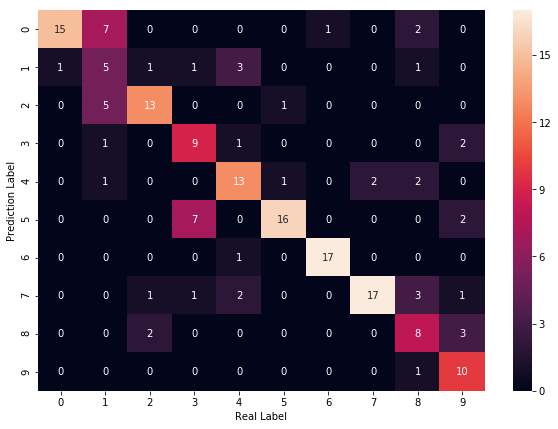

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:1 index:[5] real:5
#1 min_error:2 index:[1 2] real:2
#2 min_error:3 index:[1 7] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:2 index:[1] real:1
#5 min_error:1 index:[7] real:7
#6 min_error:2 index:[6] real:6
#7 min_error:0 index:[3] real:3
#8 min_error:0 index:[2] real:2
#9 min_error:2 index:[2] real:1
#10 min_error:2 index:[7] real:7
#11 min_error:2 index:[7] real:4
#12 min_error:1 index:[6] real:6
#13 min_error:2 index:[3 5] real:3
#14 min_error:3 index:[1 2 7] real:1
#15 min_error:2 index:[3 5 8] real:3
#16 min_error:1 index:[3] real:9
#17 min_error:3 index:[1 2 7] real:1
#18 min_error:1 index:[7] real:7
#19 min_error:1 index:[6] real:6
#20 min_error:1 index:[8] real:8
#21 min_error:1 index:[4] real:4
#22 min_error:0 index:[3] real:3
#23 min_error:3 index:[1 2 7] real:1
#24 min_error:1 index:[4] real:4
#25 min_error:0 index:[0] real:0
#26 min_error:1 index:[5] real:5
#27 min_error:1 index:[3 5] real:3
#28 min_error:1 index:[6] real:6
#29 min_error:1 index:[3 9] r

In [17]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.7210884353741497
Avg Base Learner:0.8673469387755102


In [31]:
from random import randint

list_acc = []

for iii in range(11):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.15
Accuracy on training set: 0.18888888888888888
Accuracy on training set: 0.31666666666666665
Accuracy on training set: 0.46111111111111114
Accuracy on training set: 0.42777777777777776
Accuracy on training set: 0.5111111111111111
Accuracy on training set: 0.5111111111111111
Accuracy on training set: 0.6
Accuracy on training set: 0.6333333333333333
Accuracy on training set: 0.6111111111111112
Accuracy on training set: 0.6666666666666666


In [32]:
plt.plot(range(10),list_acc)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (10,) and (11,)

In [33]:
list_acc

[0.15,
 0.18888888888888888,
 0.31666666666666665,
 0.46111111111111114,
 0.42777777777777776,
 0.5111111111111111,
 0.5111111111111111,
 0.6,
 0.6333333333333333,
 0.6111111111111112,
 0.6666666666666666]